In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Global_Pollution_Analysis.csv")
df.head()
type(df)

pandas.core.frame.DataFrame

In [ ]:
print(df.columns.tolist())

['Country', 'Year', 'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index', 'Industrial_Waste (in tons)', 'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)', 'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)', 'Energy_Consumption_Per_Capita (in MWh)', 'Population (in millions)', 'GDP_Per_Capita (in USD)']


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col = ["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index", "Industrial_Waste (in tons)", "Energy_Recovered (in GWh)", "CO2_Emissions (in MT)", "Plastic_Waste_Produced (in tons)","Energy_Consumption_Per_Capita (in MWh)"]

df[col] = scaler.fit_transform(df[col]) # Apply fit_transform to the selected columns

df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,0.898042,0.553778,0.295481,0.949995,0.299867,0.070756,41.11,0.740954,0.618509,42.22,20972.96
1,Singapore,2001,0.147062,0.173673,0.768178,0.559811,0.996027,0.092527,36.44,0.660833,0.241645,137.25,34850.41
2,Romania,2016,0.166727,0.310542,0.800768,0.559529,0.978556,1.000000,9.38,0.370326,0.648843,124.47,57773.15
3,Cook Islands,2018,0.929982,0.214222,0.596973,0.748028,0.273323,0.146326,18.97,0.175207,0.012853,67.80,21837.51
4,Djibouti,2008,0.520331,0.573161,0.799537,0.768261,0.058679,0.272347,34.00,0.784683,0.632905,186.52,41379.37


In [ ]:
from sklearn.model_selection import train_test_split
x=df[["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index"]]
y=df["Energy_Consumption_Per_Capita (in MWh)"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

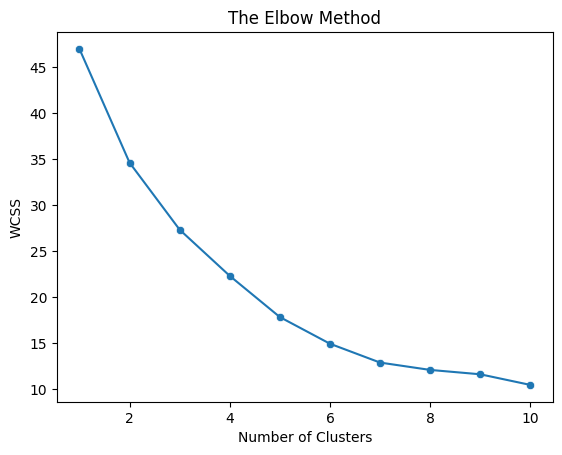

In [ ]:
from sklearn.cluster import KMeans
m=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(x)
  m.append(kmeans.inertia_)
plt.plot(range(1,11),m)
sns.scatterplot(x=range(1,11),y=m)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

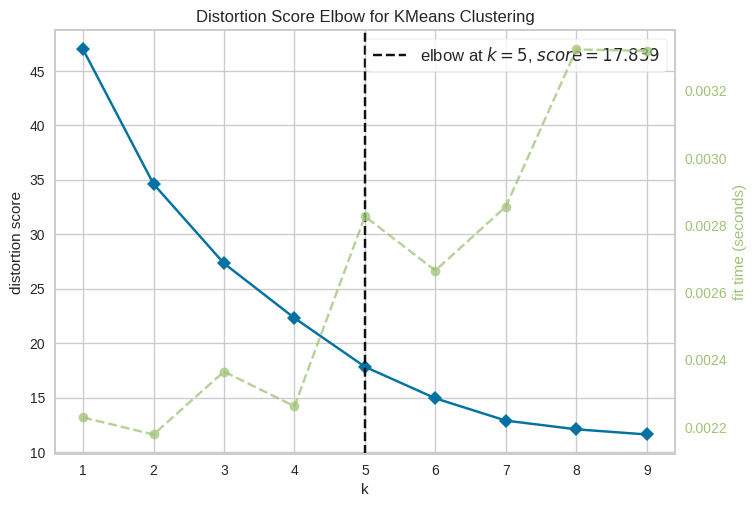

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(x)
visualizer.show()

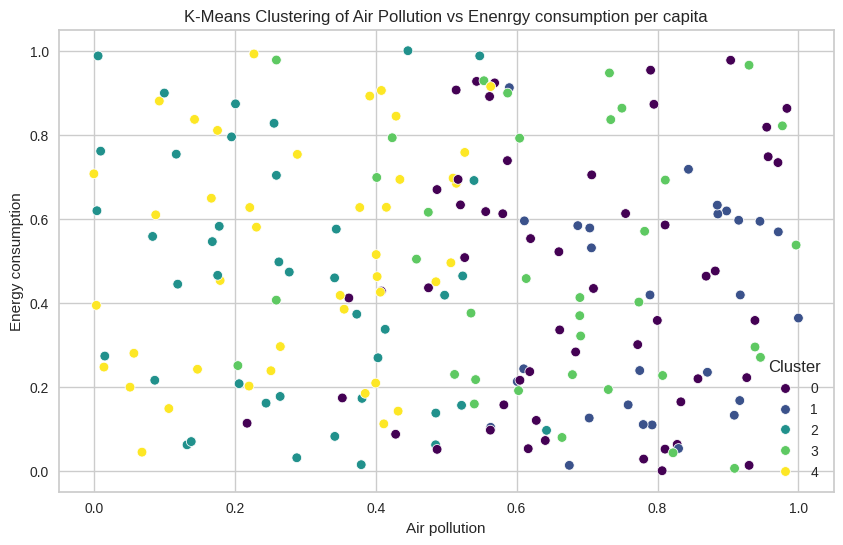

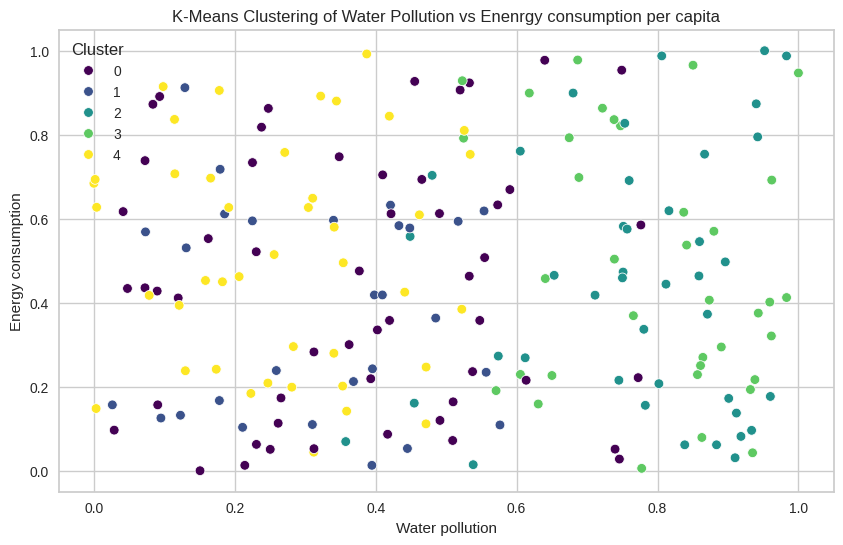

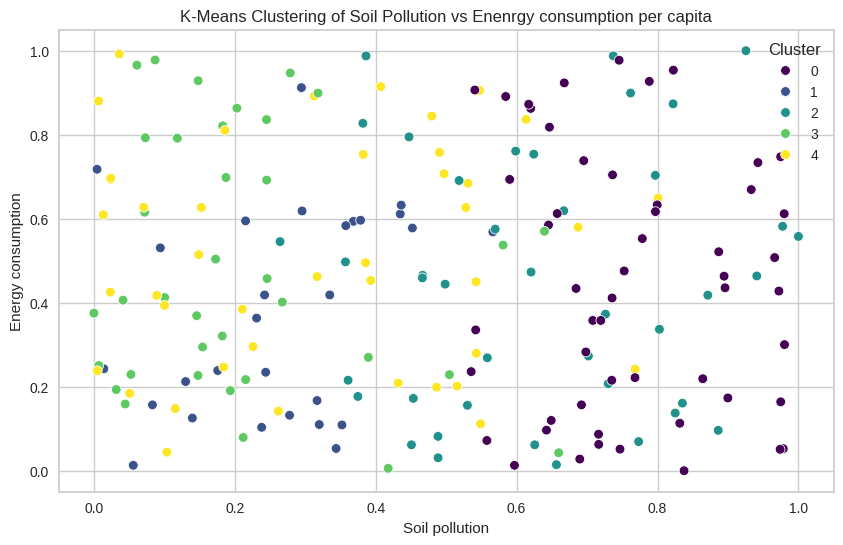

         Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index
Cluster                                                                  
0                   0.678125               0.372464              0.762379
1                   0.790455               0.316732              0.264184
2                   0.279361               0.770992              0.633366
3                   0.656189               0.792650              0.211854
4                   0.288118               0.263292              0.315255


In [ ]:
n_clusters=5

model=KMeans(n_clusters=n_clusters,init="k-means++",random_state=42)
df["Cluster"]=model.fit_predict(x)


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Air_Pollution_Index', y='Energy_Consumption_Per_Capita (in MWh)', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Air Pollution vs Enenrgy consumption per capita')
plt.xlabel('Air pollution')
plt.ylabel('Energy consumption')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Water_Pollution_Index', y='Energy_Consumption_Per_Capita (in MWh)', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Water Pollution vs Enenrgy consumption per capita')
plt.xlabel('Water pollution')
plt.ylabel('Energy consumption')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Soil_Pollution_Index', y='Energy_Consumption_Per_Capita (in MWh)', hue='Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering of Soil Pollution vs Enenrgy consumption per capita')
plt.xlabel('Soil pollution')
plt.ylabel('Energy consumption')
plt.show()

l=df.groupby("Cluster")[["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index"]].mean()
print(l)

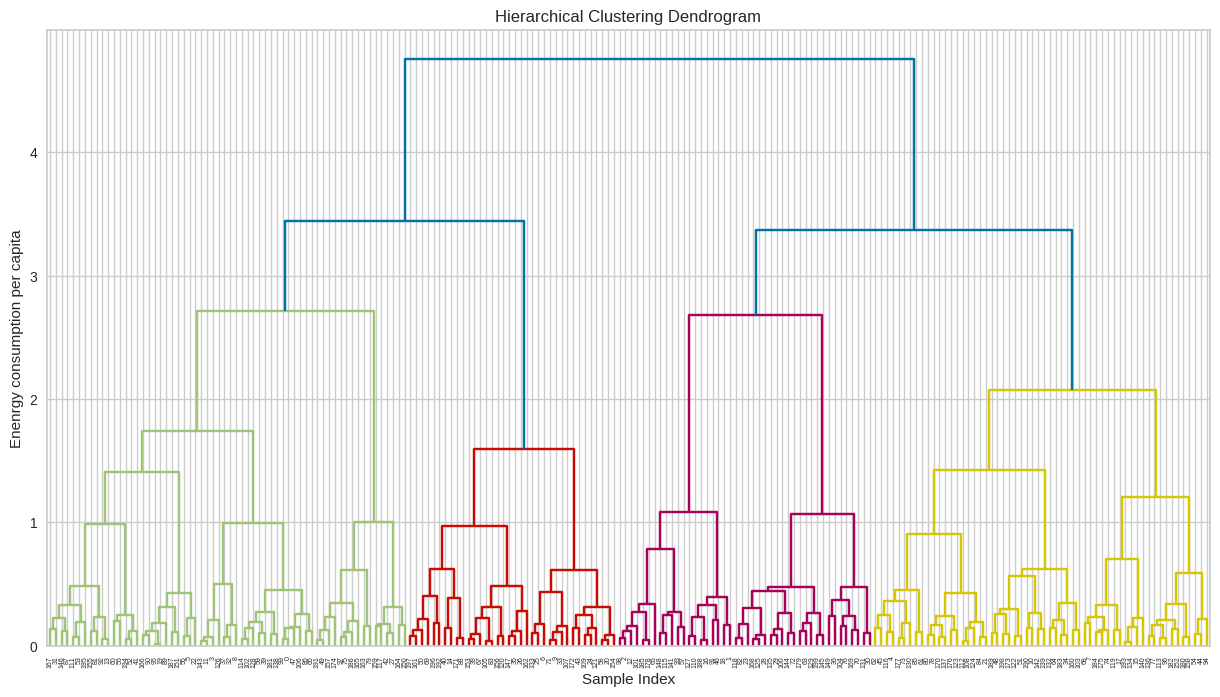

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
agg_clustering.fit(x)
linked = linkage(x, 'ward')
plt.figure(figsize=(15, 8))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Enenrgy consumption per capita')
plt.show()

In [ ]:
n_clusters_agg=4
agg_clustering_final = AgglomerativeClustering(n_clusters=n_clusters_agg)
df['Agg_Cluster'] = agg_clustering_final.fit_predict(x)

print("\nK-Means Cluster Analysis:")
print(l)

print("\nAgglomerative Clustering Analysis:")
agg_cluster_analysis = df.groupby('Agg_Cluster')[["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index"]].mean()
print(agg_cluster_analysis)


K-Means Cluster Analysis:
         Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index
Cluster                                                                  
0                   0.678125               0.372464              0.762379
1                   0.790455               0.316732              0.264184
2                   0.279361               0.770992              0.633366
3                   0.656189               0.792650              0.211854
4                   0.288118               0.263292              0.315255

Agglomerative Clustering Analysis:
             Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index
Agg_Cluster                                                                  
0                       0.584882               0.242675              0.315114
1                       0.202590               0.559742              0.625112
2                       0.595113               0.723241              0.145874
3                       0.666

In [ ]:
from sklearn.model_selection import train_test_split
x=df[["Air_Pollution_Index", "Water_Pollution_Index", "Soil_Pollution_Index", "Industrial_Waste (in tons)", "Energy_Recovered (in GWh)", "CO2_Emissions (in MT)", "Plastic_Waste_Produced (in tons)"]]
y=df["Energy_Consumption_Per_Capita (in MWh)"]
x_train_nn,x_test_nn,y_train_nn,y_test_nn=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
import torch
from torch import nn

model=nn.Sequential(
    nn.Linear(in_features=7,out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100,out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100,out_features=1),
    nn.Sigmoid()
)

In [ ]:
epochs=100
loss_list=[]
loss_fn = nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

for i in range(epochs):
  l = loss_fn(model(torch.tensor(x_train_nn.values).float()),torch.tensor(y_train_nn.values).float())

  optimizer.zero_grad()

  l.backward()

  optimizer.step()


  if i%10==0:
    print(f"Epoch {i} loss is {l}")
    loss_list.append(l.item()) # Append the scalar loss value

Epoch 0 loss is 0.07750679552555084
Epoch 10 loss is 0.07705314457416534
Epoch 20 loss is 0.07701108604669571
Epoch 30 loss is 0.07698335498571396
Epoch 40 loss is 0.07698051631450653
Epoch 50 loss is 0.07697875797748566
Epoch 60 loss is 0.07697717845439911
Epoch 70 loss is 0.0769767314195633
Epoch 80 loss is 0.07697638869285583
Epoch 90 loss is 0.07697615027427673


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([160])) that is different to the input size (torch.Size([160, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import torch

model.eval()
with torch.no_grad():
  y_pred = model(torch.tensor(x_test_nn.values).float()).squeeze().numpy() # Make predictions and convert to numpy array

mae = mean_absolute_error(y_test_nn, y_pred)
mse = mean_squared_error(y_test_nn, y_pred)
r2 = r2_score(y_test_nn, y_pred)

print("\nNeural Network Performance (PyTorch):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Neural Network Performance (PyTorch):
Mean Absolute Error (MAE): 0.2824
Mean Squared Error (MSE): 0.1011
R-squared (R2): -0.0075


--- Model Comparison and Actionable Insights ---

Clustering Results Summary:
In K-Means Cluster the optimal no. of cluster were 4 as shown by the plot where as in case of heirarchal clusters the no. of optimal clusters were 5 as shown in the dendogram.


Neural Network Performance Summary:
Mean Absolute Error (MAE): 0.2827
Mean Squared Error (MSE): 0.1013
R-squared (R2): -0.0093

--- Analysis of Strengths and Weaknesses ---

Clustering (K-Means and Hierarchical):
- Strengths: Good for identifying groups of countries with similar pollution profiles. Helps in understanding underlying patterns and segmenting data.
- Weaknesses: Does not directly predict energy recovery. Requires interpretation of cluster characteristics to derive insights related to energy.

Neural Network Model:
- Strengths: Capable of learning complex non-linear relationships between pollution indices and energy consumption, potentially offering better prediction accuracy.
- Weaknesses: Requires more data and computational resources for training. Can be a 'black box' model, making it harder to interpret how specific pollution levels influence predictions.

--- Insights and Recommendations ---

Insights from Clustering:
Clustering has revealed distinct groups of countries based on their air, water, and soil pollution indices. Analyzing the characteristics of these clusters (e.g., mean pollution levels, energy consumption) can help identify trends. For example, a cluster with high pollution indices might also show certain patterns in energy consumption or industrial waste.

Recommendations based on Clustering and Neural Network:
1. Target high-pollution clusters: Countries falling into clusters with high average pollution indices could be prioritized for targeted interventions to reduce pollution.
2. Investigate cluster-specific factors: Further analyze the countries within each cluster to identify common factors (e.g., industrial structure, regulations, economic development) that contribute to their pollution profiles and energy consumption patterns.
3. Utilize the Neural Network for Prediction and Scenario Analysis: While the current R2 is low, with further tuning and potentially more data or features, the neural network could be used to predict energy consumption based on pollution levels. This could help in:
    - Forecasting energy needs based on environmental targets.
    - Simulating the impact of pollution reduction strategies on energy consumption.
    - Identifying countries where energy consumption is unexpectedly high or low given their pollution levels.
4. Promote Renewable Energy and Energy Efficiency: For clusters with high energy consumption and pollution, promoting renewable energy sources and improving energy efficiency can be crucial strategies.
5. Implement Stricter Regulations and Waste Management: For clusters with high industrial waste and pollution, implementing stricter regulations on industrial emissions and improving waste management practices are essential.